# motta ML pipeline

## concluding thoughts

* I don't think this is going to work. Each sample is too small, they're mixed between type C and type B QPOs, and we don't have any none detections in the dataset to train the model on when to predict that there are no QPOs. It was worth a shot, but I think it's time to cut my losses and switch to plan B (which at this point is probably plan B#303 or something LOL 😆). 

### cool new paper direction idea: QPOML

* I think I would like to slightly shift the direction of the paper to making it a mixed software/demosntration paper (kinda like TLS) rather than stand alone QPO paper...I could still pioneer the application of ML to QPOs, but the development of the Python package could also make the paper more important/used/cited/etc. Additionally, it lets me split my time nicely between talking about the package to a section at the end where I (worst case scenerio) just demonstrate it/its methods/its results for MAXI-J1535, or better case, get a couple other NICER observed objects and do a little set (all need to have really good QPOs with lots of observations). Then I can still do a "global study" (perhaps with multiple instruments, so something like "QPOML II: A Global Multi-Instrument Evaluation of Machine Learning for QPO Detection and Characterization" (thus would this paper become "QPOML I: Leveraging Machine Learning to Detect and Characterize Quasi-Period Oscillations in X-Ray Binaries" ... in which case maybe we do one or two neutron stars as well?). I really like this idea, because it balances the first paper off really nicely. Furthermore, I really like the idea of building a software package for the Astronomy community, because 1. I have benefited from other people's open source packages soooo much as a nascent researcher, and 2. the citations 🤑 (lol chilllll altrustic vibes only 🧿). Either way, seems like it would work out really nicely.  

* I think I would thus describe it in a similiar way to how keras is (was?) described in relation to tensorflow:  

>> Keras is a model-level library, providing high-level building blocks for developing deep learning models. It does not handle itself low-level operations such as tensor products, convolutions and so on. Instead, it relies on a specialized, well-optimized tensor manipulation library to do so, serving as the “backend engine” of Keras.


  * i.e. "QPOML is a high-level Python library built on the backend of libraries like scikit-learn, astropy, xgboost, and shapely, among others, that strives to serve as a one-stop shop for investigating QPOs and Machine Learning concurrantly" or something like that. One of the reasons for doing this is making it easier for astro peeps with not so much ML experiance to use ML through the tools in this library ✨empowerment✨

* Thus, I need to start brainstorming a list of functionalities I want to include in the package. These could include: 
    * confusion matrix plot
    * correlation matrix plot
    * feature importances (calculation and plotting! default the shapely values one!)
    * different models (e.g. build frontend for XGBoost package, etc.)
    * classification and regression models (e.g. classify targets could be inclination, qpo type, object (in a multi-object sample), object type (e.g. neutron star or black hole), etc.
    * Options to work with different kinds of inputs (spectral xspec values, fits-file derived values (e.g. hardness, rebinned channels (which I should make a function in itself), some of the values mentioned as outputs (perhaps all in case people wanted to work backwards which would be interesting!)   

        * One thing that comes to mind is that I would like to handle all the dimensionality and array re-packaging stuff myself behind the scenes, and I would like the package functions to seemlessly scale with the number of QPOs an individual wants to include.  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

rs=35

qpo_df = pd.read_csv('https://raw.githubusercontent.com/thissop/MAXI-J1535/main/data/processed/2022/meta_qpo/motta_cleaned.csv')

spectral_df = pd.read_csv('https://raw.githubusercontent.com/thissop/MAXI-J1535/main/code/misc/meta_preparation/rxte_motta/fits_key.csv')

xspec_df = pd.read_csv('https://raw.githubusercontent.com/thissop/MAXI-J1535/main/code/misc/meta_preparation/rxte_motta/fit_routine/results/output.csv')

spectral_df = spectral_df.merge(xspec_df, on='obsid')

master = qpo_df.merge(spectral_df, left_on='ID', right_on='obsid')

master = master.sample(frac=1)

master['net_count_rate'] = master['net_source_count']/master['exposure_time']

master

,ID,source_x,type,inclination,freq,qpo_rms,noise_rms,total_rms,freq_err,noise_err,...,net_source_count,source_y,nH,gamma,kT_e,nthcomp_norm,diskbb_Tin,diskbb_norm,red_pgstat,net_count_rate
11,91423-01-02-00,Swift J1753.5-0.1,C,low,0.614,9.4,35.5,36.7,"(0.005, 0.005)","(0.8, 0.6)",...,1.705370e+06,SWIFT_J1753.5-0127,1.63554,1.92529,10.6942,0.758750,1.24894,505.696,3242.636812,527.651726
35,70128-01-01-00,4U 1543-47,C,low,4.317,11.2,24.1,26.6,"(0.038, 0.038)","(1.6, 1.6)",...,2.895239e+06,4U1543-47,1.63554,2.13061,14.9094,1.320610,1.19212,619.192,4517.597933,214.907890
552,95405-01-02-04,H 1743-322,B,high,2.346,6.1,0.0,6.1,"(0.062, 0.062)","(0,0)",...,2.822621e+05,H_1743-322,1.63554,2.07895,11.8322,0.921792,1.20875,414.947,2901.619192,271.405860
485,40124-01-39-00,XTE 1859+226,B,intermediate,5.687,4.0,1.8,7.1,"(0.063, 0.063)","(0.2, 0.2)",...,1.638877e+07,XTE_J1859+226,1.63554,2.11010,10.0000,1.569910,1.21520,682.701,5516.798357,2806.295610
492,30191-01-32-00,XTE J1550-564,B,high,5.403,4.5,2.3,9.0,"(0.034, 0.034)","(0.2, 0.3)",...,1.652825e+07,XTE_J1550-564,1.63554,2.22338,17.9020,2.039950,1.25214,684.532,5132.615005,18782.099681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,80117-01-22-00,4U 1630-47,C,high,4.024,6.7,13.2,14.8,"(0.009, 0.009)","(1.0, 1.0)",...,2.874340e+05,4U_1630-47,1.63554,2.13276,13.8643,1.310330,1.19772,581.241,4100.889081,124.754327
425,95358-01-02-01,XTE J1859+226,C,high,2.263,11.6,23.6,26.3,"(0.008, 0.008)","(0.3, 0.3)",...,1.431938e+06,MAXI_J1659-152,1.63554,1.95522,10.9810,0.746523,1.23001,456.821,2742.028515,877.412841
129,40124-01-05-00,XTE J1859+226,C,intermediate,3.051,15.3,25.8,30.0,"(0.01, 0.01)","(1.1, 1.3)",...,2.832540e+06,XTE_J1859+226,1.63554,2.19650,16.0276,1.879370,1.25108,672.340,5231.887927,3105.855365
152,40124-01-31-00,XTE J1859+226,C,intermediate,7.257,6.0,12.5,14.2,"(0.034, 0.034)","(1.3, 1.1)",...,6.554309e+06,XTE_J1859+226,1.63554,2.19403,11.4652,1.809870,1.21357,681.433,5186.766477,6206.731804


In [ ]:
list(set(master['inclination']))

['low', 'high', 'intermediate']

In [ ]:
master['type']

130    C
549    B
481    B
129    C
225    C
      ..
509    B
235    C
39     C
188    C
294    C
Name: type, Length: 562, dtype: object

In [3]:
def split_sample(df, inclinations_to_exclude:list=None, cutoff:int=None, types_to_exclude=None, additional_x:list=None, test_prop:int=0.1): 
    import pandas as pd
    import numpy as np
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder, normalize
    from pandas.api.types import is_numeric_dtype
    
    sources = list(set(master['object']))

    if inclinations_to_exclude!=None: 
        for inclination in inclinations_to_exclude: 
            mask = df['inclination']==inclination
            df = df[~mask]
            
    
    if cutoff!=None:  
        for source in sources: 
            counts = len(np.where(df['object']==source)[0])
            if counts<cutoff: 
                mask = df['object']==source
                df = df[~mask]
    
    if types_to_exclude!=None: 
        for type_to_exclude in types_to_exclude: 
            mask = df['type']==type_to_exclude
            df = df[~mask]

    counts = []
    for source in sources: 
        counts.append(len(np.where(df['object']==source)[0]))

    counts = np.array(counts)

    idx = np.argsort(counts)[::-1]
    idx = idx[counts[idx]>0]

    print(np.array([np.array(sources)[idx], counts[idx]]).T)

    x_cols = ['gamma', 'diskbb_Tin', 'diskbb_norm', 'nthcomp_norm', 'net_count_rate']
    if additional_x!=None: 
        for i in additional_x: 
            x_cols.append(i)
        
    new_df = pd.DataFrame()
    for x_col in x_cols: 
        col = df[x_col]
        if is_numeric_dtype(col):
            new_df[x_col] = col/max(col)
        else: 
            enc = LabelEncoder()
            enc.fit(col)
            new_df[x_col] = enc.transform(col) 
    
    y_df = df['freq']/max(df['freq'])

    return train_test_split(new_df, y_df, test_size=test_prop, random_state=rs)

X_train, X_test, y_train, y_test = split_sample(master, 
                                                inclinations_to_exclude=None, 
                                                cutoff=40, types_to_exclude=None, 
                                                additional_x=['inclination', 'type'])

[['XTE_J1550-564' '65']]


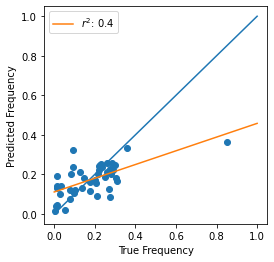

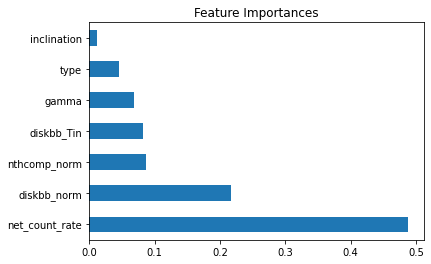

In [ ]:
from scipy.stats import linregress as ols

regr = RandomForestRegressor()
regr.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(4,4))

predictions = regr.predict(X_test)

results = ols(y_test, predictions)
r_sq = results[2]**2

slope = results[0]
intercept = results[1]

ax.scatter(y_test, predictions)
ax.plot((0,1), (0,1))

x = np.array([0,1])
ax.plot(x,slope*x+intercept, label=r'$r^2$'+': '+str(round(r_sq, 2)))

ax.legend()

ax.set(xlabel='True Frequency', ylabel='Predicted Frequency')

plt.show()

feat_importances = pd.Series(regr.feature_importances_, index=X_test.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.title("Feature Importances")
plt.show()

### TESTING ONE OBJECT AFTER FIXING
* specifically, testing XTE_J1550-564 after nH was frozen to literature values, and all were re-fit with kT_e frozen to the weighted median value when it was kept free (weighted to $\frac{1}{\mathrm{reduced}\;\chi^2}$, where larger values have stronger weight) 
* This object has the most obsids of any of them left (just 64), so if this doesn't work I'm going to revaluate this process.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

rs=35

qpo_df = pd.read_csv('https://raw.githubusercontent.com/thissop/MAXI-J1535/main/data/processed/2022/meta_qpo/motta_cleaned.csv')

spectral_df = pd.read_csv('https://raw.githubusercontent.com/thissop/MAXI-J1535/main/code/misc/meta_preparation/rxte_motta/fits_key.csv')

xspec_df = pd.read_csv('XTE_J1550-564 testing.csv')

spectral_df = spectral_df.merge(xspec_df, on='obsid')

master = qpo_df.merge(spectral_df, left_on='ID', right_on='obsid')

master = master.sample(frac=1)

master['net_count_rate'] = master['net_source_count']/master['exposure_time']

master

,ID,source_x,type,inclination,freq,qpo_rms,noise_rms,total_rms,freq_err,noise_err,...,net_source_count,source_y,nH,gamma,kT_e,nthcomp_norm,diskbb_Tin,diskbb_norm,red_pgstat,net_count_rate
62,40401-01-61-01,XTE J1550-564,B,high,9.142,3.5,0.0,8.4,"(0.67, 0.67)","(0,0)",...,3.043501e+06,XTE_J1550-564,0.8,2.27288,31.0,3.24767,1.022810,1317.960,4897.611940,3804.376338
20,30191-01-28-02,XTE J1550-564,C,high,4.959,14.5,17.3,23.4,"(0.009, 0.009)","(0.9, 1.1)",...,2.269143e+07,XTE_J1550-564,0.8,2.26098,31.0,4.92587,0.925203,827.957,9830.237789,13904.062229
9,30188-06-08-00,XTE J1550-564,C,high,3.161,15.2,18.5,24.0,"(0.004, 0.004)","(0.6, 0.6)",...,4.869977e+07,XTE_J1550-564,0.8,2.04911,31.0,3.52032,0.810052,457.197,3922.072165,17593.846528
57,40401-01-56-01,XTE J1550-564,B,high,6.277,4.9,0.0,4.9,"(0.054, 0.054)","(0,0)",...,2.341529e+06,XTE_J1550-564,0.8,2.26787,31.0,3.28711,1.028280,1272.210,5821.301180,12195.461044
7,30188-06-06-00,XTE J1550-564,C,high,3.297,14.9,18.0,23.5,"(0.006, 0.006)","(0.9, 1.0)",...,4.884223e+07,XTE_J1550-564,0.8,1.95808,31.0,2.38524,0.973965,183.613,2107.514516,17543.904174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,30191-01-27-00,XTE J1550-564,C,high,5.544,14.6,14.6,20.6,"(0.025, 0.027)","(0.4, 0.4)",...,5.552761e+07,XTE_J1550-564,0.8,2.25623,31.0,5.05171,0.927709,781.027,13121.205788,15424.335134
33,50135-01-03-00,XTE J1550-564,C,high,1.124,12.9,32.2,34.6,"(0.007, 0.007)","(2.1, 2.1)",...,2.244093e+06,XTE_J1550-564,0.8,2.28334,31.0,3.23942,0.993097,1395.740,3631.869475,834.855998
37,50137-02-01-00,XTE J1550-564,C,high,0.237,10.7,40.6,42.0,"(0.002, 0.002)","(2.3, 2.6)",...,3.129239e+06,XTE_J1550-564,0.8,2.28565,31.0,3.22169,0.977883,1437.180,3093.330913,843.006293
48,30191-01-32-00,XTE J1550-564,B,high,5.403,4.5,2.3,9.0,"(0.034, 0.034)","(0.2, 0.3)",...,1.652825e+07,XTE_J1550-564,0.8,2.26988,31.0,4.56406,0.943221,926.354,7174.174901,18782.099681


In [16]:
rs = 46

X_train, X_test, y_train, y_test = split_sample(master, 
                                                inclinations_to_exclude=None, 
                                                cutoff=None, types_to_exclude=['B'], 
                                                additional_x=['inclination', 'type'])

[['XTE_J1550-564' '47']]


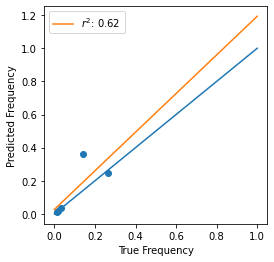

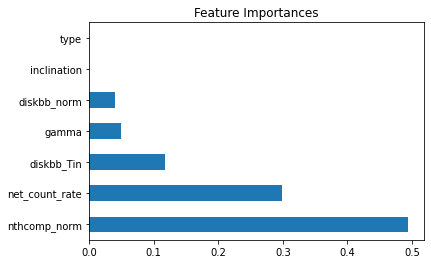

In [17]:
from scipy.stats import linregress as ols

regr = RandomForestRegressor()
regr.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(4,4))

predictions = regr.predict(X_test)

results = ols(y_test, predictions)
r_sq = results[2]**2

slope = results[0]
intercept = results[1]

ax.scatter(y_test, predictions)
ax.plot((0,1), (0,1))

x = np.array([0,1])
ax.plot(x,slope*x+intercept, label=r'$r^2$'+': '+str(round(r_sq, 2)))

ax.legend()

ax.set(xlabel='True Frequency', ylabel='Predicted Frequency')

plt.show()

feat_importances = pd.Series(regr.feature_importances_, index=X_test.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.title("Feature Importances")
plt.show()